In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# **Data Cleaning**

In [96]:
df = pd.read_csv('condo.csv')
df.head()

,Name,Price,Link,Amenities,Long Term,Minimum Stay,City,Neighborhood,Location,Floor,...,gym,restaurant,bank,pharmacy,police,subway_station,train_station,university,transit_station,bus_station
0,Semi Furnished Studio Unit at Residencia de Re...,12000,https://rentpad.com.ph/long-term-rentals/quezo...,24/7 Security; Swimming pool,"12,000 /Month",1 Year,Quezon City,Loyola Heights,Residencia de Regina,6.0,...,1,1,1,1,1,0,1,1,1,0
1,FOR LEASE 1 BR Condo Unit at High Park Towers ...,58000,https://rentpad.com.ph/long-term-rentals/quezo...,NaN,"58,000 /Month",1 Year,Quezon City,Diliman,High Park Vertis,15.0,...,1,1,1,1,1,0,0,1,1,1
2,1BR Fully Furnished Unit at Trees Residences Q...,14000,https://rentpad.com.ph/long-term-rentals/quezo...,Multi-Purpose Hall; 24/7 Security; Function Ro...,"14,000 /Month",6 Months,Quezon City,Novaliches,Trees Residences,7.0,...,1,1,1,1,1,0,0,1,1,0
3,Studio Unit in Studio A Katipunan,22000,https://rentpad.com.ph/long-term-rentals/quezo...,Gym; Study Hall; 24/7 Security; Swimming pool,"22,000 /Month",1 Year,Quezon City,Loyola Heights,Studio A,27.0,...,1,1,1,1,1,0,1,1,1,0
4,Unfurnished 2BR Condo Trees Residences near SM...,18000,https://rentpad.com.ph/long-term-rentals/quezo...,Concierge; Jogging Trail; Gym; 24/7 Security; ...,"18,000 /Month",1 Year,Quezon City,Novaliches,Trees Residences,7.0,...,1,1,1,1,0,0,0,1,1,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1659 non-null   object 
 1   Price            1659 non-null   int64  
 2   Link             1659 non-null   object 
 3   Amenities        1544 non-null   object 
 4   Long Term        1655 non-null   object 
 5   Minimum Stay     1640 non-null   object 
 6   City             1651 non-null   object 
 7   Neighborhood     1523 non-null   object 
 8   Location         1510 non-null   object 
 9   Floor            1247 non-null   float64
 10  Square Area      1650 non-null   float64
 11  Bedrooms         1659 non-null   int64  
 12  Bathrooms        1659 non-null   int64  
 13  Security         1426 non-null   float64
 14  Pool             1377 non-null   float64
 15  Airconditioning  476 non-null    float64
 16  Parking          557 non-null    float64
 17  Balcony       

In [98]:
drop_col=['Name', 'Link', 'Long Term', 'Minimum Stay', 'City', 'Neighborhood', 'Location', 'Floor', 'Updated', 'Longitude', 'Latitude', 'Address', 'Province', 'Region']
df.drop(drop_col, axis=1, inplace=True)

In [99]:
amenities_list = df['Amenities'].str.split(';').explode()

unique_amenities = amenities_list.dropna().str.strip().unique()

for amenity in unique_amenities:
    if amenity:
        df[amenity] = df['Amenities'].fillna('').str.contains(amenity).astype(int)

df.drop('Amenities', axis=1, inplace=True)

display(df.head())

,Price,Square Area,Bedrooms,Bathrooms,Security,Pool,Airconditioning,Parking,Balcony,Pets Allowed,...,24/7 Security,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space
0,12000,25.0,0,1,1.0,1.0,NaN,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,58000,61.0,1,1,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14000,25.0,1,1,1.0,1.0,NaN,0,0,0,...,1,1,1,1,0,0,0,0,0,0
3,22000,28.0,0,1,1.0,1.0,NaN,0,0,0,...,1,1,0,0,1,1,0,0,0,0
4,18000,30.0,2,1,1.0,1.0,NaN,0,0,0,...,1,1,0,0,1,0,1,1,0,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1659 non-null   int64  
 1   Square Area         1650 non-null   float64
 2   Bedrooms            1659 non-null   int64  
 3   Bathrooms           1659 non-null   int64  
 4   Security            1426 non-null   float64
 5   Pool                1377 non-null   float64
 6   Airconditioning     476 non-null    float64
 7   Parking             1659 non-null   int64  
 8   Balcony             1659 non-null   int64  
 9   Pets Allowed        1659 non-null   int64  
 10  Furnishing          1659 non-null   object 
 11  Rating              1084 non-null   float64
 12  ReviewsCount        1084 non-null   float64
 13  school              1659 non-null   int64  
 14  hospital            1659 non-null   int64  
 15  shopping_mall       1659 non-null   int64  
 16  superm

In [101]:
one_hot_encoder = OneHotEncoder()
one_hot_encoding = one_hot_encoder.fit_transform(df[['Furnishing']].values)
df_one_hot = pd.DataFrame(one_hot_encoding.toarray(), columns=one_hot_encoder.get_feature_names_out(['Furnishing']))

df = pd.concat([df, df_one_hot], axis=1)
df.drop('Furnishing', axis=1, inplace=True)

print(df.head())

   Price  Square Area  Bedrooms  Bathrooms  Security  Pool  Airconditioning  \
0  12000         25.0         0          1       1.0   1.0              NaN   
1  58000         61.0         1          1       NaN   NaN              NaN   
2  14000         25.0         1          1       1.0   1.0              NaN   
3  22000         28.0         0          1       1.0   1.0              NaN   
4  18000         30.0         2          1       1.0   1.0              NaN   

   Parking  Balcony  Pets Allowed  ...  Function Rooms  Gym  Study Hall  \
0        0        0             0  ...               0    0           0   
1        0        0             0  ...               0    0           0   
2        0        0             0  ...               1    0           0   
3        0        0             0  ...               0    1           1   
4        0        0             0  ...               0    1           0   

   Concierge  Jogging Trail  Play Room  Storage Space  \
0          0     

In [102]:
drop_col = ['Pool', '24/7 Security', 'gym', 'church', 'Pets Allowed', 'school', 'hospital', 'shopping_mall', 'supermarket', 'church', 'park', 'restaurant', 'bank', 'pharmacy', 'police', 'subway_station', 'train_station', 'university', 'transit_station', 'bus_station']
df.drop(drop_col, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       1659 non-null   int64  
 1   Square Area                 1650 non-null   float64
 2   Bedrooms                    1659 non-null   int64  
 3   Bathrooms                   1659 non-null   int64  
 4   Security                    1426 non-null   float64
 5   Airconditioning             476 non-null    float64
 6   Parking                     1659 non-null   int64  
 7   Balcony                     1659 non-null   int64  
 8   Rating                      1084 non-null   float64
 9   ReviewsCount                1084 non-null   float64
 10  Swimming pool               1659 non-null   int64  
 11  Multi-Purpose Hall          1659 non-null   int64  
 12  Function Rooms              1659 non-null   int64  
 13  Gym                         1659 

In [103]:
df.head()

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,...,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space,Furnishing_Fully Furnished,Furnishing_Semi Furnished,Furnishing_Unfurnished
0,12000,25.0,0,1,1.0,NaN,0,0,4.1,27.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,58000,61.0,1,1,NaN,NaN,0,0,4.4,44.0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
2,14000,25.0,1,1,1.0,NaN,0,0,4.2,85.0,...,1,0,0,0,0,0,0,1.0,0.0,0.0
3,22000,28.0,0,1,1.0,NaN,0,0,NaN,NaN,...,0,1,1,0,0,0,0,1.0,0.0,0.0
4,18000,30.0,2,1,1.0,NaN,0,0,4.2,37.0,...,0,1,0,1,1,0,0,0.0,0.0,1.0


In [104]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].round(1)

median_imputer = SimpleImputer(strategy='median')
df['Square Area'] = median_imputer.fit_transform(df[['Square Area']])
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])
df['Price'] = median_imputer.fit_transform(df[['Price']])

In [105]:
df.head()

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,...,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space,Furnishing_Fully Furnished,Furnishing_Semi Furnished,Furnishing_Unfurnished
0,12000.0,25.0,0,1,1.0,NaN,0,0,4.1,27.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,58000.0,61.0,1,1,NaN,NaN,0,0,4.4,44.0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
2,14000.0,25.0,1,1,1.0,NaN,0,0,4.2,85.0,...,1,0,0,0,0,0,0,1.0,0.0,0.0
3,22000.0,28.0,0,1,1.0,NaN,0,0,4.3,66.5,...,0,1,1,0,0,0,0,1.0,0.0,0.0
4,18000.0,30.0,2,1,1.0,NaN,0,0,4.2,37.0,...,0,1,0,1,1,0,0,0.0,0.0,1.0


In [106]:
df.fillna(0, inplace=True)
display(df.head(10))

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,...,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space,Furnishing_Fully Furnished,Furnishing_Semi Furnished,Furnishing_Unfurnished
0,12000.0,25.00,0,1,1.0,0.0,0,0,4.1,27.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
1,58000.0,61.00,1,1,0.0,0.0,0,0,4.4,44.0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
2,14000.0,25.00,1,1,1.0,0.0,0,0,4.2,85.0,...,1,0,0,0,0,0,0,1.0,0.0,0.0
3,22000.0,28.00,0,1,1.0,0.0,0,0,4.3,66.5,...,0,1,1,0,0,0,0,1.0,0.0,0.0
4,18000.0,30.00,2,1,1.0,0.0,0,0,4.2,37.0,...,0,1,0,1,1,0,0,0.0,0.0,1.0
5,80000.0,191.00,3,3,0.0,0.0,1,1,4.3,66.5,...,0,0,0,0,0,0,0,0.0,0.0,1.0
6,10000.0,28.00,1,1,0.0,0.0,0,0,4.3,66.5,...,0,0,0,0,0,0,0,0.0,0.0,1.0
7,65000.0,73.00,2,6,0.0,0.0,0,0,4.4,37.0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
8,55000.0,61.00,1,1,1.0,1.0,0,1,4.4,44.0,...,1,1,0,1,0,1,1,1.0,0.0,0.0
9,25000.0,45.02,1,1,1.0,0.0,0,1,4.3,66.5,...,1,0,0,1,1,0,0,1.0,0.0,0.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       1659 non-null   float64
 1   Square Area                 1659 non-null   float64
 2   Bedrooms                    1659 non-null   int64  
 3   Bathrooms                   1659 non-null   int64  
 4   Security                    1659 non-null   float64
 5   Airconditioning             1659 non-null   float64
 6   Parking                     1659 non-null   int64  
 7   Balcony                     1659 non-null   int64  
 8   Rating                      1659 non-null   float64
 9   ReviewsCount                1659 non-null   float64
 10  Swimming pool               1659 non-null   int64  
 11  Multi-Purpose Hall          1659 non-null   int64  
 12  Function Rooms              1659 non-null   int64  
 13  Gym                         1659 

In [108]:
# df.to_csv('cleaned_condo_data.csv', index=False)

# **Feature Engineering**

In [109]:
df = pd.read_csv('cleaned_condo.csv')
df.head()

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Furnishing_Fully Furnished,Furnishing_Semi Furnished,Furnishing_Unfurnished
0,1800.0,19.0,1.0,1.0,0.0,1.0,0.0,0.0,4.3,66.5,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,3000.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,4.3,66.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3000.0,20.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3250.0,23.0,1.0,1.0,1.0,0.0,0.0,0.0,4.3,66.5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,3300.0,24.0,1.0,1.0,1.0,1.0,0.0,0.0,4.2,163.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       3000 non-null   float64
 1   Square Area                 3000 non-null   float64
 2   Bedrooms                    3000 non-null   float64
 3   Bathrooms                   3000 non-null   float64
 4   Security                    3000 non-null   float64
 5   Airconditioning             3000 non-null   float64
 6   Parking                     3000 non-null   float64
 7   Balcony                     3000 non-null   float64
 8   Rating                      1638 non-null   float64
 9   ReviewsCount                1638 non-null   float64
 10  Swimming pool               3000 non-null   float64
 11  Multi-Purpose Hall          3000 non-null   float64
 12  Function Rooms              3000 non-null   float64
 13  Gym                         3000 

In [111]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])
df['Rating'] = df['Rating'].round(1)

median_imputer = SimpleImputer(strategy='median')
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])

In [112]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       3000 non-null   float64
 1   Square Area                 3000 non-null   float64
 2   Bedrooms                    3000 non-null   float64
 3   Bathrooms                   3000 non-null   float64
 4   Security                    3000 non-null   float64
 5   Airconditioning             3000 non-null   float64
 6   Parking                     3000 non-null   float64
 7   Balcony                     3000 non-null   float64
 8   Rating                      3000 non-null   float64
 9   ReviewsCount                3000 non-null   float64
 10  Swimming pool               3000 non-null   float64
 11  Multi-Purpose Hall          3000 non-null   float64
 12  Function Rooms              3000 non-null   float64
 13  Gym                         3000 non-n

In [113]:
df['price_per_sqm'] = df['Price'] / df['Square Area']

amenity_columns = ['Security', 'Airconditioning', 'Parking', 'Balcony', 
                   'Swimming pool', 'Multi-Purpose Hall', 'Function Rooms', 
                   'Gym', 'Study Hall']
df['amenities_count'] = df[amenity_columns].sum(axis=1)

def categorize_size(area):
    if area < 25:
        return "Studio"
    elif area < 50:
        return "Small"
    elif area < 75:
        return "Medium"
    else:
        return "Large"

df['size_category'] = df['Square Area'].apply(categorize_size)

print("New features created:")
print(f"Price per sqm: {df['price_per_sqm'].describe()}")
print(f"\nAmenities count: {df['amenities_count'].value_counts().sort_index()}")
print(f"\nSize category distribution: {df['size_category'].value_counts()}")

print("\nFirst 5 rows with new features:")
print(df[['Price', 'Square Area', 'price_per_sqm', 'amenities_count', 'size_category']].head())

New features created:
Price per sqm: count    3000.000000
mean     1178.291967
std       463.812791
min        94.736842
25%       782.608696
50%      1134.912069
75%      1489.361702
max      2896.235294
Name: price_per_sqm, dtype: float64

Amenities count: amenities_count
1.0       5
2.0      16
3.0      91
4.0     219
5.0     389
6.0     414
7.0     304
8.0     357
9.0     721
10.0    484
Name: count, dtype: int64

Size category distribution: size_category
Small     1949
Medium     413
Large      390
Studio     248
Name: count, dtype: int64

First 5 rows with new features:
    Price  Square Area  price_per_sqm  amenities_count size_category
0  1800.0         19.0      94.736842              5.0        Studio
1  3000.0         12.0     250.000000              5.0        Studio
2  3000.0         20.0     150.000000              2.0        Studio
3  3250.0         23.0     141.304348              4.0        Studio
4  3300.0         24.0     137.500000              5.0        Studio


In [114]:
print("=== Data Analysis for Demand Classification ===")
print(f"Price per sqm statistics:")
print(df['price_per_sqm'].describe())
print(f"\nSize category distribution:")
print(df['size_category'].value_counts())
print(f"\nRating distribution:")
print(df['Rating'].describe())

price_per_sqm_low = df['price_per_sqm'].quantile(0.4)
price_per_sqm_high = df['price_per_sqm'].quantile(0.75)
amenities_low = df['amenities_count'].quantile(0.4)
amenities_high = df['amenities_count'].quantile(0.8)
rating_threshold = df['Rating'].quantile(0.6)

print(f"\n=== Refined Demand Classification Thresholds ===")
print(f"Price per sqm - Affordable: ≤{price_per_sqm_low:.2f}, Expensive: ≥{price_per_sqm_high:.2f}")
print(f"Amenities count - Low: ≤{amenities_low:.0f}, High: ≥{amenities_high:.0f}")
print(f"Rating threshold: ≥{rating_threshold:.2f}")

def classify_occupancy_demand_refined(row):
    """
    Refined classification considering:
    1. Popular size categories (Studio/Small)
    2. Affordability (price per sqm)
    3. Amenities and comfort features
    4. Quality indicators (rating)
    5. Essential features (parking, AC)
    """
    
    high_demand_factors = 0
    low_demand_factors = 0
    
    if row['size_category'] in ['Studio', 'Small']:
        high_demand_factors += 2
    elif row['size_category'] == 'Medium':
        high_demand_factors += 1
    else:
        low_demand_factors += 1
    
    if row['price_per_sqm'] <= price_per_sqm_low:
        high_demand_factors += 2
    elif row['price_per_sqm'] >= price_per_sqm_high:
        low_demand_factors += 2

    if row['amenities_count'] >= amenities_high:
        high_demand_factors += 2
    elif row['amenities_count'] <= amenities_low:
        low_demand_factors += 1
    
    if row['Rating'] >= rating_threshold:
        high_demand_factors += 1
    elif row['Rating'] < 4.0:
        low_demand_factors += 2
    
    if row['Parking'] == 1:
        high_demand_factors += 1
    else:
        low_demand_factors += 1
    
    if row['Airconditioning'] == 1:
        high_demand_factors += 1

    if row['Balcony'] == 1:
        high_demand_factors += 0.5
    
    if row['Security'] == 1:
        high_demand_factors += 1
    
    net_score = high_demand_factors - low_demand_factors
    
    if net_score >= 4:
        return 'High Demand'
    elif net_score >= 1:
        return 'Medium Demand'
    else:
        return 'Low Demand'

df['occupancy_demand'] = df.apply(classify_occupancy_demand_refined, axis=1)

print(f"\n=== Occupancy Demand Classification Results ===")
demand_distribution = df['occupancy_demand'].value_counts()
print(f"Demand distribution:")
print(demand_distribution)
print(f"\nPercentage distribution:")
print((demand_distribution / len(df) * 100).round(2))

print(f"\n=== Average Characteristics by Demand Category ===")
demand_analysis = df.groupby('occupancy_demand').agg({
    'price_per_sqm': 'mean',
    'amenities_count': 'mean',
    'Rating': 'mean',
    'Square Area': 'mean',
    'Parking': 'mean',
    'Airconditioning': 'mean'
}).round(2)
print(demand_analysis)

print(f"\n=== Sample Properties by Demand Category ===")
for demand_type in ['High Demand', 'Medium Demand', 'Low Demand']:
    if demand_type in df['occupancy_demand'].values:
        print(f"\n{demand_type} examples:")
        sample = df[df['occupancy_demand'] == demand_type][['Price', 'Square Area', 'price_per_sqm', 
                                                            'amenities_count', 'size_category', 'Rating', 
                                                            'Parking', 'Airconditioning', 'occupancy_demand']].head(3)
        print(sample.to_string(index=False))
    else:
        print(f"\nNo {demand_type} properties found")

=== Data Analysis for Demand Classification ===
Price per sqm statistics:
count    3000.000000
mean     1178.291967
std       463.812791
min        94.736842
25%       782.608696
50%      1134.912069
75%      1489.361702
max      2896.235294
Name: price_per_sqm, dtype: float64

Size category distribution:
size_category
Small     1949
Medium     413
Large      390
Studio     248
Name: count, dtype: int64

Rating distribution:
count    3000.000000
mean        4.301367
std         0.280287
min         1.000000
25%         4.300000
50%         4.300000
75%         4.300000
max         5.000000
Name: Rating, dtype: float64

=== Refined Demand Classification Thresholds ===
Price per sqm - Affordable: ≤974.02, Expensive: ≥1489.36
Amenities count - Low: ≤7, High: ≥9
Rating threshold: ≥4.30

=== Occupancy Demand Classification Results ===
Demand distribution:
occupancy_demand
High Demand      2164
Medium Demand     828
Low Demand          8
Name: count, dtype: int64

Percentage distribution:
oc

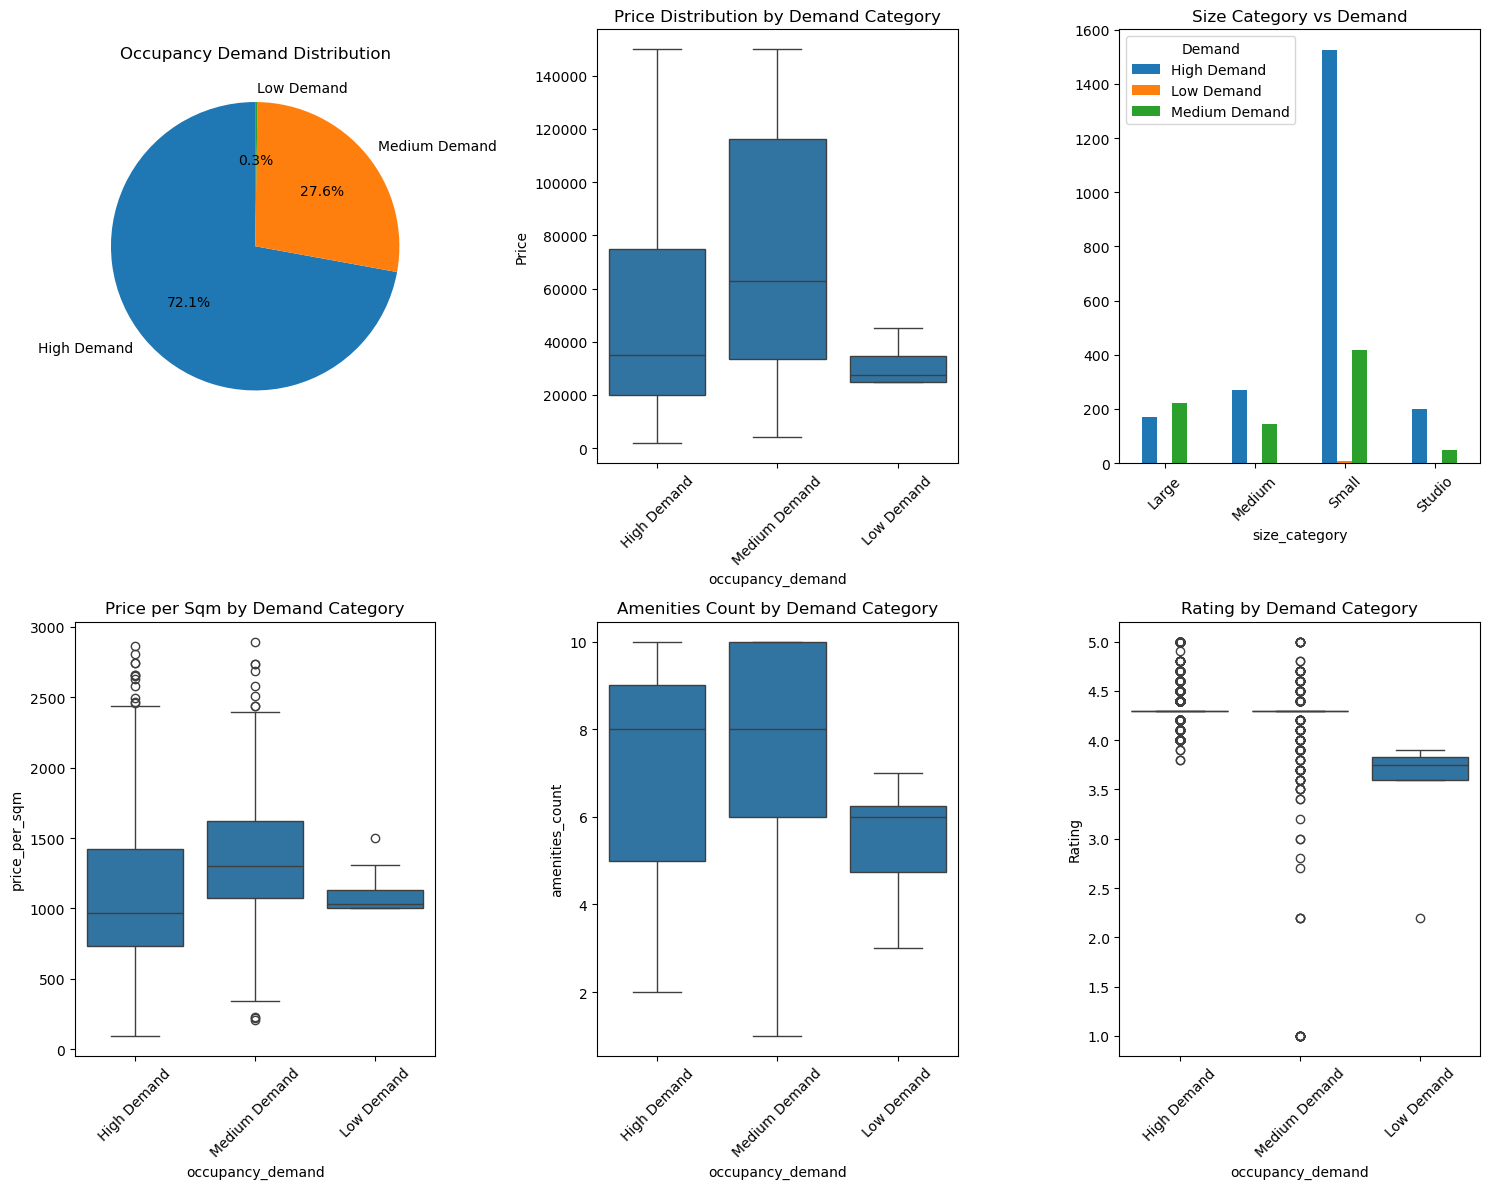

In [115]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
demand_counts = df['occupancy_demand'].value_counts()
plt.pie(demand_counts.values, labels=demand_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Occupancy Demand Distribution')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='occupancy_demand', y='Price')
plt.title('Price Distribution by Demand Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
demand_size_crosstab = pd.crosstab(df['size_category'], df['occupancy_demand'])
demand_size_crosstab.plot(kind='bar', ax=plt.gca())
plt.title('Size Category vs Demand')
plt.xticks(rotation=45)
plt.legend(title='Demand')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='occupancy_demand', y='price_per_sqm')
plt.title('Price per Sqm by Demand Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='occupancy_demand', y='amenities_count')
plt.title('Amenities Count by Demand Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='occupancy_demand', y='Rating')
plt.title('Rating by Demand Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       3000 non-null   float64
 1   Square Area                 3000 non-null   float64
 2   Bedrooms                    3000 non-null   float64
 3   Bathrooms                   3000 non-null   float64
 4   Security                    3000 non-null   float64
 5   Airconditioning             3000 non-null   float64
 6   Parking                     3000 non-null   float64
 7   Balcony                     3000 non-null   float64
 8   Rating                      3000 non-null   float64
 9   ReviewsCount                3000 non-null   float64
 10  Swimming pool               3000 non-null   float64
 11  Multi-Purpose Hall          3000 non-null   float64
 12  Function Rooms              3000 non-null   float64
 13  Gym                         3000 non-n

In [117]:
one_hot_encoding = one_hot_encoder.fit_transform(df[['size_category', 'occupancy_demand']].values)
df_one_hot = pd.DataFrame(one_hot_encoding.toarray(), columns=one_hot_encoder.get_feature_names_out(['size_category', 'occupancy_demand']))

df = pd.concat([df, df_one_hot], axis=1)
df.drop(['size_category', 'occupancy_demand'], axis=1, inplace=True)

print(df.head())

    Price  Square Area  Bedrooms  Bathrooms  Security  Airconditioning  \
0  1800.0         19.0       1.0        1.0       0.0              1.0   
1  3000.0         12.0       1.0        1.0       1.0              1.0   
2  3000.0         20.0       0.0        1.0       1.0              1.0   
3  3250.0         23.0       1.0        1.0       1.0              0.0   
4  3300.0         24.0       1.0        1.0       1.0              1.0   

   Parking  Balcony  Rating  ReviewsCount  ...  Furnishing_Unfurnished  \
0      0.0      0.0     4.3          66.5  ...                     1.0   
1      0.0      0.0     4.3          66.5  ...                     1.0   
2      0.0      0.0     5.0           1.0  ...                     1.0   
3      0.0      0.0     4.3          66.5  ...                     1.0   
4      0.0      0.0     4.2         163.0  ...                     1.0   

   price_per_sqm  amenities_count  size_category_Large  size_category_Medium  \
0      94.736842              

In [118]:
df.head(20)

,Price,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,Rating,ReviewsCount,...,Furnishing_Unfurnished,price_per_sqm,amenities_count,size_category_Large,size_category_Medium,size_category_Small,size_category_Studio,occupancy_demand_High Demand,occupancy_demand_Low Demand,occupancy_demand_Medium Demand
0,1800.0,19.0,1.0,1.0,0.0,1.0,0.0,0.0,4.3,66.5,...,1.0,94.736842,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3000.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,4.3,66.5,...,1.0,250.000000,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3000.0,20.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,1.0,...,1.0,150.000000,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,3250.0,23.0,1.0,1.0,1.0,0.0,0.0,0.0,4.3,66.5,...,1.0,141.304348,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,3300.0,24.0,1.0,1.0,1.0,1.0,0.0,0.0,4.2,163.0,...,1.0,137.500000,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,3400.0,24.0,0.0,1.0,1.0,1.0,0.0,0.0,4.3,66.5,...,1.0,141.666667,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,3600.0,14.0,0.0,1.0,1.0,1.0,0.0,0.0,4.3,66.5,...,1.0,257.142857,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,4200.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,3.9,58.0,...,1.0,221.052632,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,4500.0,19.0,0.0,1.0,1.0,0.0,0.0,0.0,4.3,66.5,...,1.0,236.842105,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,5000.0,22.0,1.0,1.0,0.0,0.0,0.0,0.0,4.6,16.0,...,1.0,227.272727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [119]:
df.to_csv('final_condo_data.csv', index=False)